In [59]:
import pickle
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

In [60]:
df = pd.read_csv('/home/akeemlag/Downloads/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [61]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [62]:
cols_to_drop = ['area_type', 'availability', 'balcony', 'society']
df = df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [63]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [64]:
# Data Cleaning
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [65]:
df.bath = df.bath.fillna(df.bath.mean())

In [66]:
df = df.dropna(axis=0)

In [67]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [68]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [69]:
# Convert our Size to an int
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [70]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [71]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [72]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True 

In [73]:
df[~df.total_sqft.apply(isfloat)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.00000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.00000,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.00000,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.69261,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.00000,59.135,2


In [74]:
def convert_rng_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [75]:
convert_rng_to_num('2100-2332')

2216.0

In [76]:
df_copy = df.copy()
df_copy['total_sqft'] = df_copy['total_sqft'].apply(convert_rng_to_num)

In [77]:
df_copy.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [78]:
df2 = df_copy.copy()

In [79]:
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']

In [80]:
df2.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [81]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [82]:
# Remove spacing in location
df2.location = df2.location.apply(lambda x: x.strip())

In [83]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats

location
Whitefield              540
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          273
Thanisandra             237
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
Kamdhenu Nagar            1
Kanakadasa Layout         1
K N Extension             1
Name: location, Length: 1293, dtype: int64

In [84]:
loc_stat_less_than_10 = location_stats[location_stats<=10]
loc_stat_less_than_10

location
1st Block Koramangala    10
Nagadevanahalli          10
Sector 1 HSR Layout      10
Dairy Circle             10
Sadashiva Nagar          10
                         ..
Kalhalli                  1
Kalkere Channasandra      1
Kamdhenu Nagar            1
Kanakadasa Layout         1
K N Extension             1
Name: location, Length: 1052, dtype: int64

In [85]:
df2.location = df2.location.apply(lambda x: 'other' if x in loc_stat_less_than_10 else x)

In [86]:
df2.location.value_counts()

location
other                        2882
Whitefield                    540
Sarjapur  Road                397
Electronic City               304
Kanakpura Road                273
                             ... 
Nehru Nagar                    11
Narayanapura                   11
Kodigehalli                    11
2nd Phase Judicial Layout      11
Marsur                         11
Name: count, Length: 242, dtype: int64

In [87]:
# Outlier detection and removal
df2['total_sqft'].describe()

count    13257.000000
mean      1558.809175
std       1238.478935
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [88]:
df2.total_sqft.value_counts()

total_sqft
1200.0     843
1100.0     221
1500.0     204
2400.0     195
600.0      180
          ... 
2485.0       1
30400.0      1
1701.0       1
1264.0       1
1557.0       1
Name: count, Length: 1996, dtype: int64

In [89]:
df2[df2.total_sqft/df2.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [90]:
df3 = df2[~(df2.total_sqft/df2.BHK<300)]

In [91]:
df3.shape

(12559, 7)

In [92]:
df3.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [93]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df4 = remove_pps_outlier(df3)

In [94]:
df4.shape

(10286, 7)

In [95]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [96]:
df4.groupby(['location', 'BHK'])['BHK'].value_counts().sort_values(ascending=False)

location              BHK
other                 2      984
                      3      858
Whitefield            2      232
other                 4      224
Electronic City       2      179
                            ... 
5th Block Hbr Layout  5        1
                      6        1
6th Phase JP Nagar    4        1
8th Phase JP Nagar    5        1
9th Phase JP Nagar    1        1
Name: count, Length: 806, dtype: int64

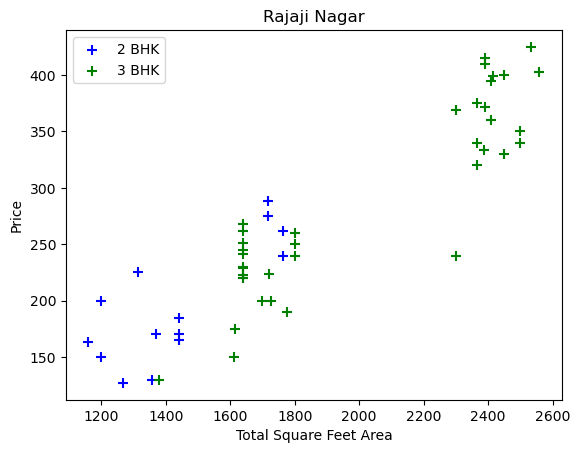

In [97]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', marker='+', s=50, label='2 BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location);
    plt.legend()

plot_scatter_chart(df4, 'Rajaji Nagar')


In [98]:
for bhk, bhk_df in df.groupby('BHK'):
    print(bhk)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
16
18
19
27
43


In [99]:
df4.BHK.value_counts()

BHK
2     4754
3     4021
4      763
1      526
5      110
6       62
7       19
8       16
9        8
10       3
11       2
16       1
13       1
Name: count, dtype: int64

In [100]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0],
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

    
df5 = remove_bhk_outliers(df4)

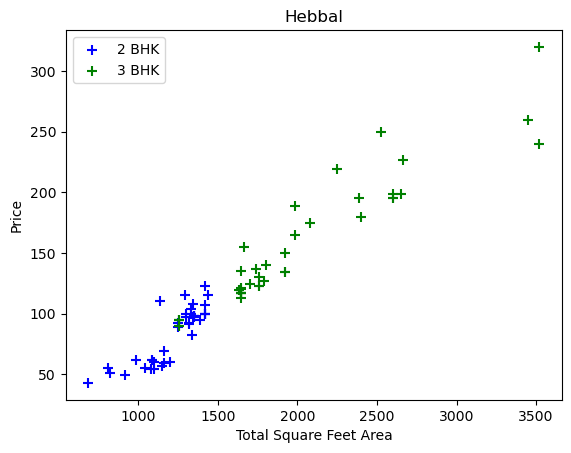

In [101]:
plot_scatter_chart(df5, 'Hebbal');

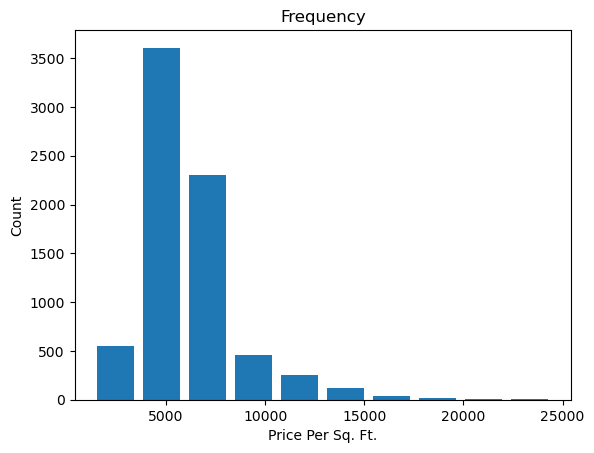

In [102]:
# Plot a histogram
plt.hist(df5['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price Per Sq. Ft.')
plt.ylabel('Count')
plt.title('Frequency');

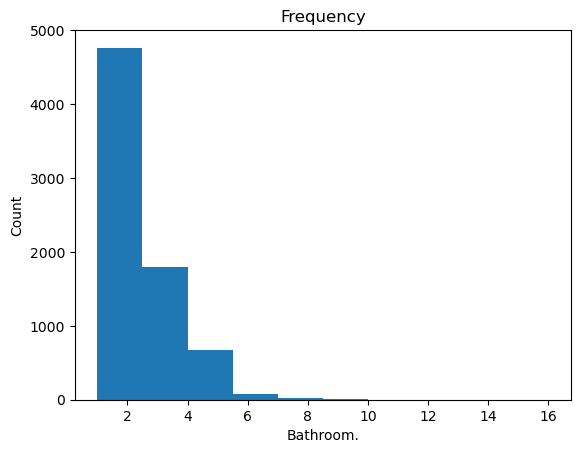

In [103]:
# Plot a histogram to show occurence of baths
plt.hist(df5['bath'], rwidth=0.8,histtype='stepfilled')
plt.xlabel('Bathroom.')
plt.ylabel('Count')
plt.title('Frequency');

### Most of the bathrooms are within 1-3

In [104]:
# Remove bathroom that are greater than the size + 2
df6 = df5[df5.bath<df5.BHK+2]

In [105]:
df6.shape

(7275, 7)

In [106]:
cols_to_drop = ['size', 'price_per_sqft']
df7 = df6.drop(cols_to_drop, axis=1)

In [107]:
df7.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [108]:
# Use get_dummies for location feature for a one-hot-encoding
dummies = pd.get_dummies(df7.location)
df8 = pd.concat([df7, dummies.drop('other', axis=1)], axis=1)
df8.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [109]:
df9 = df8.drop('location', axis=1)

In [110]:
# Creating the feature matrix and target vector
X = df9.drop('price', axis=1)
y = df9.price

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [112]:
lr_clf = LinearRegression()


In [113]:
lr_clf.fit(X_train, y_train)

LinearRegression()

In [114]:
lr_clf.score(X_test, y_test)

0.8577580719087561

In [115]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85775807, 0.86740306, 0.77201548, 0.83155687, 0.84312689])

In [116]:

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'n_jobs': [1,3,5]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['poisson', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for model_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_params': gs.best_params_,
            'best_score': gs.best_score_
        })
    return pd.DataFrame(scores, columns=['model', 'best_params', 'best_score'])

In [117]:
find_best_model_using_gridsearchcv(X, y)

,model,best_params,best_score
0,linear_regression,{'n_jobs': 1},0.834372
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.697173
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.660525


In [118]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [119]:
np.where(X.columns=='5th Block Hbr Layout')[0][0]

7

In [125]:
def get_predict_price(location, sqft, bath, BHK):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1
    x_df = pd.DataFrame([x], columns=X.columns)
    return lr_clf.predict(x_df)[0]

In [126]:
get_predict_price('1st Phase JP Nagar', 1000, 2, 2)

95.22516778465743

In [127]:
get_predict_price('1st Phase JP Nagar', 1000, 3, 2)

98.4223491790469

In [65]:
# Importing the model
with open('/home/akeemlag/IdeaProjects/Data-Science/data-science-maths/Projects/house-pricing-model', 'wb') as model:
    pickle.dump(lr_clf, model)

In [ ]:
columns = {
    'data_columns': [col for col in X.columns]
}

with open('/home/akeemlag/IdeaProjects/Data-Science/data-science-maths/Projects/columns.json', 'w') as f:
    f.write(json.dumps(columns))